In [1]:
import numpy as np

from scipy.linalg import eigh

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
        
def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)

# Cube

In [ ]:
# E = []

# square_P = [[-1, -1], [-1, 1], [1, 1], [1, -1]]
# P = []

# for face_number in range(2):
#     for vertex_number in range(4):
#         position_3D = square_P[vertex_number] + [1 if face_number else -1]
#         P.append(position_3D)
        
#         current_vertex = face_number * 4 + vertex_number
#         opposite_vertex = (1 - face_number) * 4 + vertex_number
        
#         previous_vertex = face_number * 4 + ((vertex_number - 1) % 4)            
#         next_vertex = face_number * 4 + ((vertex_number + 1) % 4)
        
#         for neighbor in (previous_vertex, next_vertex, opposite_vertex):
#             undirected_pair = (current_vertex, neighbor) if current_vertex > neighbor else (neighbor, current_vertex)
#             if undirected_pair not in E:
#                 E.append(undirected_pair)

# Toy Network

In [2]:
E = [(1, 0), (2, 0), (3, 0), (3, 2), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (11, 10), (11, 3), (11, 2), (11, 0), (12, 11), (13, 11), (14, 11), (15, 11)]

xn = [1.1, 1.9, 0.1, 0.3, 1.6, 0.8, 2.3, 1.2, 1.7, 1.0, -0.7, 0.1, 0.1, -0.9, 0.1, -0.1]
yn = [-1.2, -2.0, -1.2, -0.7, -0.4, -2.2, -1.0, -1.3, -1.5, -2.1, -0.7, -0.3, 0.7, -0.0, -0.3, 0.7]
zn = [-1.6, -1.5, -1.3, -2.0, -2.4, -2.1, -1.8, -2.8, -0.5, -0.8, -0.4, -1.1, -1.8, -1.5, 0.1, -0.6]

P = list(zip(xn, yn, zn))

In [ ]:
num_nodes = len(P)
num_edges = len(E)
print(num_nodes, num_edges)

# Simple Visualization

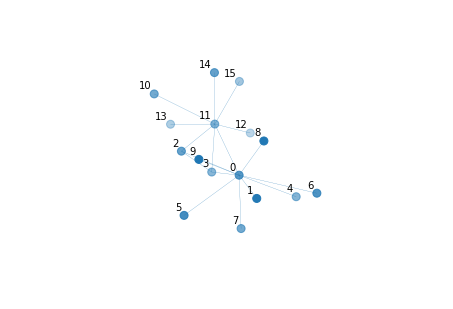

In [4]:
plt.close('all')
fig = plt.figure()
ax = Axes3D(fig)

x = [p[0] for p in P]
y = [p[1] for p in P]
z = [p[2] for p in P]

ax.scatter(x, y, z, marker='o', s = 64)  

for j, xyz_ in enumerate(P): 
    annotate3D(ax, s=str(j), xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')   
    
segments = [(P[s], P[t]) for s, t in E] 
edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

ax.set_axis_off()
plt.show()
plt.close('all')

# NetworkX

In [5]:
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from(E)

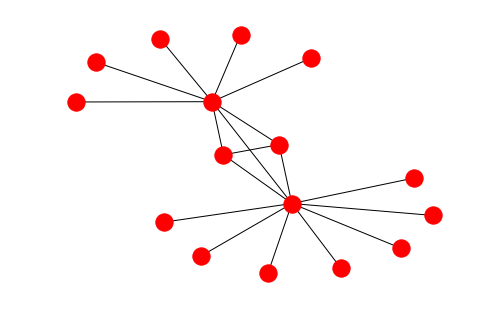

In [6]:
nx.draw_spring(G)

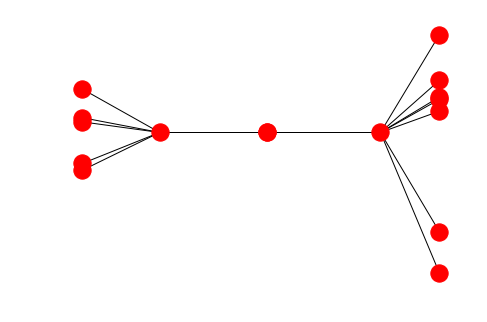

In [7]:
nx.draw_spectral(G)

# Home-made Spectral

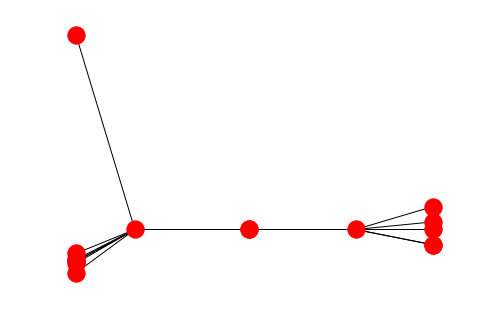

In [8]:
# Compute the Laplacian
L = np.zeros([num_nodes, num_nodes])

for edge in E:
    L[edge[0], edge[1]] = 1.0    
    L[edge[1], edge[0]] = 1.0
    
for row_number in range(num_nodes):
    L[row_number, row_number] = -1.0 * L[row_number].sum()
    
# Laplacian matrices are real and symmetric, so we can use eigh, 
# the variation on eig specialized for Hermetian matrices.

# w = eigenvalues, v = eigenvectors
w, v = eigh(L)

# Last coordinate is ignored as it is nearly zero.
# Obtain 2nd and 3rd last coordinates (for 2D embedding)
x = v[:, -2] 
y = v[:, -3]
z = v[:, -4]

spectral_coordinates = {i : (x[i], y[i]) for i in range(num_nodes)}

nx.draw(G, pos=spectral_coordinates)
plt.show()

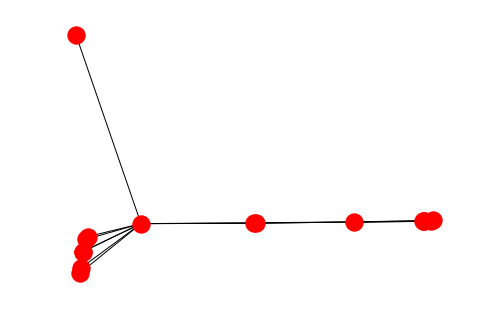

In [9]:
# Compute the edge-weighted Laplacian
L = np.zeros([num_nodes, num_nodes])

for edge in E:    
    # Distances
    s = 1.0 / np.linalg.norm(np.array(P[edge[1]]) - np.array(P[edge[0]]))
    
    L[edge[0], edge[1]] = s   
    L[edge[1], edge[0]] = s
    
for row_number in range(num_nodes):
    L[row_number, row_number] = -1.0 * L[row_number].sum()
    
# print(L)

w, v = eigh(L)

x = v[:, -2] 
y = v[:, -3]

spectral_coordinates = {i : (x[i], y[i]) for i in range(num_nodes)}

nx.draw(G, pos=spectral_coordinates)
plt.show()

# 3D Spectral Layout

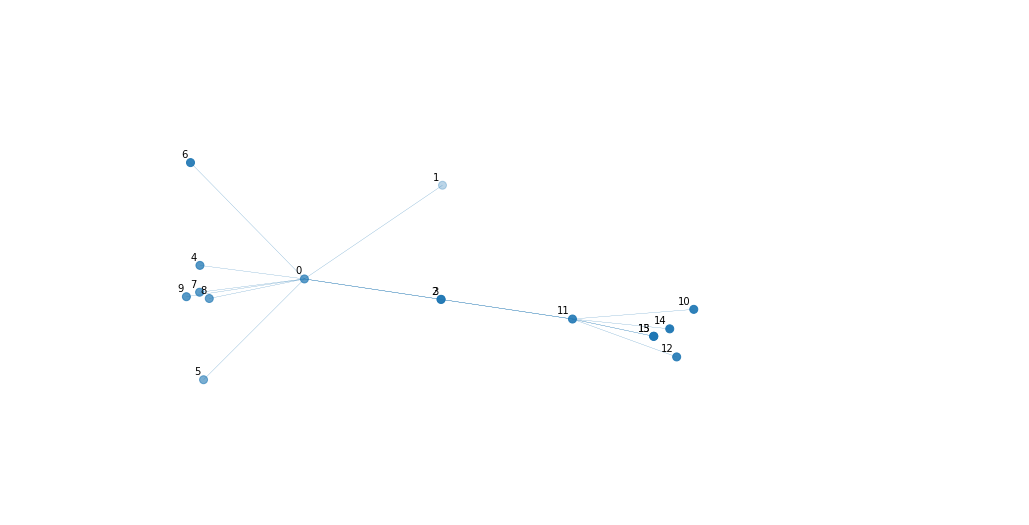

In [19]:
# Graph Laplacian works better
L = np.zeros([num_nodes, num_nodes])
for edge in E:
    L[edge[0], edge[1]] = 1.0    
    L[edge[1], edge[0]] = 1.0
for row_number in range(num_nodes):
    L[row_number, row_number] = -1.0 * L[row_number].sum()

w, v = eigh(L)

plt.close('all')

fig = plt.figure(figsize=(14, 7))
ax = Axes3D(fig)

x = v[:, -2] 
y = v[:, -3]
z = v[:, -4]
positions = list(zip(x, y, z))
spectral_coordinates = {i : (x[i], y[i], z[i]) for i in range(num_nodes)}

ax.scatter(x, y, z, marker='o', s = 64)  

for j, xyz_ in enumerate(positions): 
    annotate3D(ax, s=str(j), xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')   

segments = [(positions[s], positions[t]) for s, t in E] 
edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)

ax.set_axis_off()
plt.show()
plt.close('all')

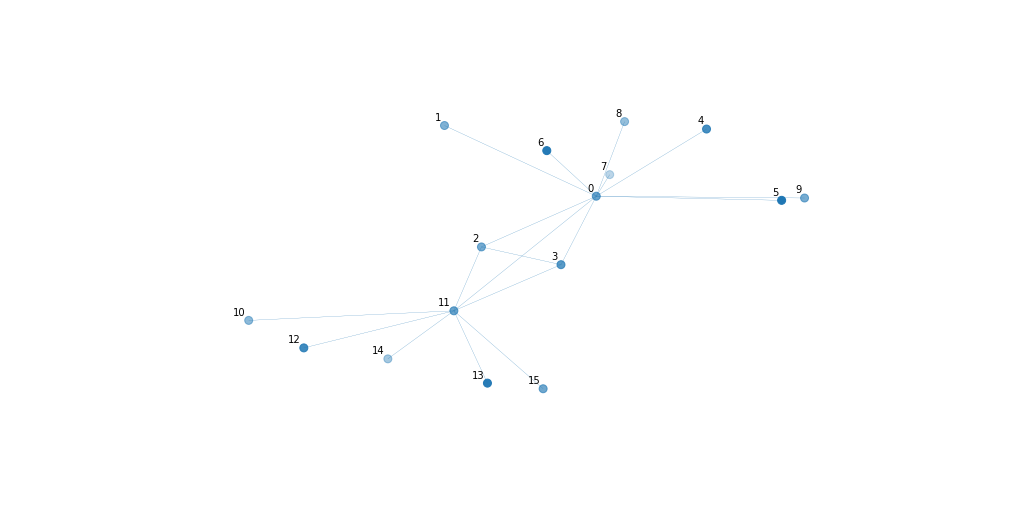

In [11]:
pos = nx.spring_layout(G, dim=3)

fig = plt.figure(figsize=(14, 7))
ax = Axes3D(fig)
        
# Map the position dictionary from nx into ordered lists, based on the original order of H.nodes()
x = [pos[node][0] for node in G.nodes()]
y = [pos[node][1] for node in G.nodes()]
z = [pos[node][2] for node in G.nodes()]
positions = list(zip(x, y, z))

node_names = list(G.nodes())

ax.scatter(x, y, z, marker='o', s = 64)  

for j, xyz_ in enumerate(positions): 
    annotate3D(ax, s=node_names[j], xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')   

segments = []
node_to_int = {node: node_count for node_count, node in enumerate(G.nodes())}
for edge in G.edges():
    s = node_to_int[edge[0]]
    t = node_to_int[edge[1]]
    segments.append([positions[s], positions[t]])

edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)

ax.set_axis_off()
    
plt.show()

# Initialize with spectral layout

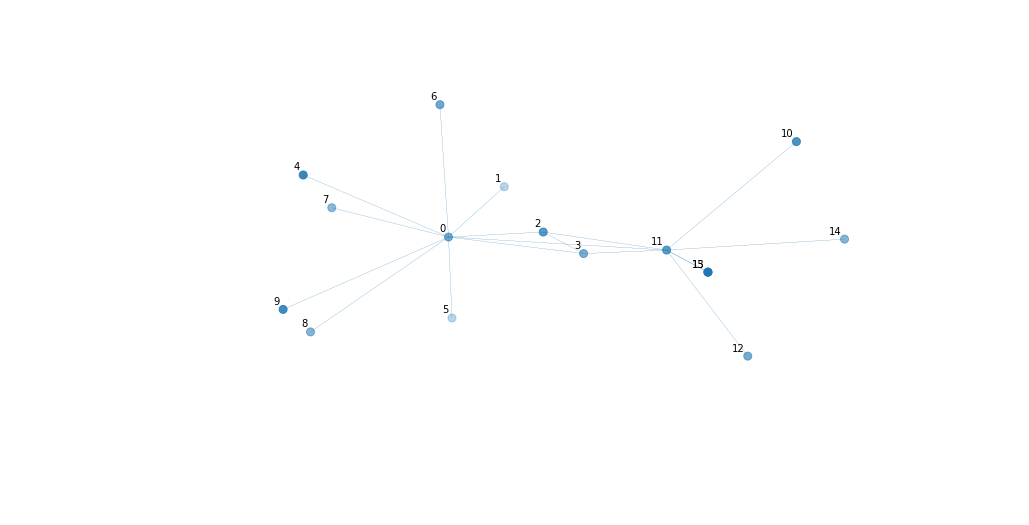

In [31]:
pos = nx.spring_layout(G, dim=3, pos=spectral_coordinates)

fig = plt.figure(figsize=(14, 7))
ax = Axes3D(fig)
        
# Map the position dictionary from nx into ordered lists, based on the original order of H.nodes()
x = [pos[node][0] for node in G.nodes()]
y = [pos[node][1] for node in G.nodes()]
z = [pos[node][2] for node in G.nodes()]
positions = list(zip(x, y, z))

node_names = list(G.nodes())

ax.scatter(x, y, z, marker='o', s = 64)  

for j, xyz_ in enumerate(positions): 
    annotate3D(ax, s=node_names[j], xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')   

segments = []
node_to_int = {node: node_count for node_count, node in enumerate(G.nodes())}
for edge in G.edges():
    s = node_to_int[edge[0]]
    t = node_to_int[edge[1]]
    segments.append([positions[s], positions[t]])

edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)

ax.set_axis_off()
    
plt.show()

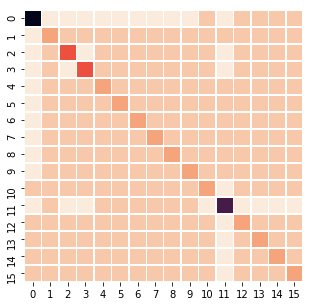

In [49]:
import seaborn as sns

plt.figure(figsize=(5, 5))
ax = sns.heatmap(L, linewidth=0.5, cbar=False)
plt.show()